In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/mpst_full_data.csv")

In [3]:
tags = []
for i,j in enumerate(df.tags):
    temp = j.split(", ")
    tags.extend(temp)

In [4]:
set(tags)

{'absurd',
 'action',
 'adult comedy',
 'allegory',
 'alternate history',
 'alternate reality',
 'anti war',
 'atmospheric',
 'autobiographical',
 'avant garde',
 'blaxploitation',
 'bleak',
 'boring',
 'brainwashing',
 'christian film',
 'claustrophobic',
 'clever',
 'comedy',
 'comic',
 'cruelty',
 'cult',
 'cute',
 'dark',
 'depressing',
 'dramatic',
 'entertaining',
 'fantasy',
 'feel-good',
 'flashback',
 'good versus evil',
 'gothic',
 'grindhouse film',
 'haunting',
 'historical',
 'historical fiction',
 'home movie',
 'horror',
 'humor',
 'insanity',
 'inspiring',
 'intrigue',
 'magical realism',
 'melodrama',
 'murder',
 'mystery',
 'neo noir',
 'non fiction',
 'paranormal',
 'philosophical',
 'plot twist',
 'pornographic',
 'prank',
 'psychedelic',
 'psychological',
 'queer',
 'realism',
 'revenge',
 'romantic',
 'sadist',
 'satire',
 'sci-fi',
 'sentimental',
 'storytelling',
 'stupid',
 'suicidal',
 'suspenseful',
 'thought-provoking',
 'tragedy',
 'violence',
 'western',
 

In [5]:
mapping = {
    "action": ["action", "good versus evil", "revenge", "suicidal" ],
    "comedy": ["comedy", "comic", "humor", "prank","satire"  ],
    "cult":["cult", "melodrama" ],
    "fantasy":["avant garde", "fantasy", "home movie", "magical realism", "whimsical"],
    "thriller":["clever", "insanity","intrigue", "murder", "mystery", "neo noir", "psychological", "suspenseful"],
    "horror":["gothic", "grindhouse film", "haunting", "horror", "paranormal", ],
    "romantic":["cute", "queer","romantic"  ],
    "sci-fi":["alternate reality", "atmospheric", "sci-fi" ],
    "drama":["absurd", "boring", "adult comedy", "autobiographical", "dramatic", 
             "entertaining", "feel-good", "flashback", "historical","historical fiction", 
             "inspiring", "non fiction", "philosophical", "plot twist","realism", "sentimental", 
             "storytelling", "stupid", "thought-provoking", "tragedy", "western", "christian film"],
    "dark":["bleak", "claustrophobic", "blaxploitation", "cruelty", "dark", "depressing", "sadist", "violence", "psychedelic"]
    
}

In [6]:
def tag_finder(mapping, tag):
    for key, values in mapping.items():
        if tag in values:
            return key            

In [7]:
df["tags_final"] = None
for i,j in enumerate(df.tags):
    temp = j.split(", ")
    new_tags = []
    for a in temp:
        tag = tag_finder(mapping, a)
        if tag is not None:
            new_tags.append(tag)
    df.tags_final[i] = new_tags

In [8]:
#Removing movies that don't belong to any tag
df = df[df.tags_final.apply(lambda x: len(x)) != 0]

In [9]:
tags_list = []
for i in df.tags_final:
    tags_list.extend(i)

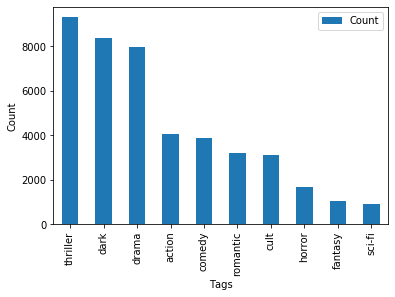

In [10]:
tags_counts = Counter(tags_list)
df_summary = pd.DataFrame.from_dict(tags_counts, orient='index', columns=["Count"])
df_summary.sort_values(by="Count", ascending=False, inplace=True)
plot = df_summary.plot(kind='bar')
plot.set_xlabel("Tags")
plot.set_ylabel("Count")
plt.show()

In [11]:
bit_mapping = {
    "action": 0,
    "comedy": 1,
    "cult":2,
    "fantasy":3,
    "thriller":4,
    "horror":5,
    "romantic":6,
    "sci-fi":7,
    "drama":8,
    "dark":9    
}

In [12]:
y_targets = np.zeros((len(df), len(bit_mapping)))

In [13]:
for movie, tags in enumerate(df.tags_final):
    no_of_tags = len(tags)
    weight_tags = 1/no_of_tags
    for tag in tags:
        index = bit_mapping[tag]
        y_targets[movie][index] = y_targets[movie][index] + weight_tags